In [3]:
#imports
from scipy import stats
import sympy as sp
import numpy as np
import pandas as pd
import numpy as np
#plots
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def indicator(p_value, alpha=0.05):
    if p_value < alpha:
        return "Reject H0"
    else:
        return "Fail to Reject H0"

In [5]:
def generate_ar1(n, phi=0.8, mu=0, sigma=1.0, x0=0):
    """
    Generate AR(1) autocorrelated data.
    n: Number of time points
    phi: Autocorrelation coefficient (between -1 and 1)
    sigma: Std. dev. of the noise
    x0: Initial value
    """
    x = np.zeros(n)
    x[0] = x0
    for t in range(1, n):
        x[t] = phi * x[t - 1] + np.random.normal(mu, sigma)
    return x

In [6]:
def generate_ar1_with_correlated_errors(n, phi=0.8, rho=0.5, mu=0, sigma=1.0, x0=0, e0=0):
    """
    Generate AR(1) data where the errors are themselves autocorrelated (AR(1) errors).
    
    - n: Number of time points
    - phi: AR(1) coefficient for x_t
    - rho: AR(1) coefficient for error correlation
    - mu: Mean of white noise
    - sigma: Std. dev. of white noise
    - x0: Initial value of the AR(1) process
    - e0: Initial value of the error process
    
    Returns:
    - x: Generated AR(1) series with correlated errors
    """
    x = np.zeros(n)
    eps = np.zeros(n)
    x[0] = x0
    eps[0] = e0

    #generate white noise
    u = np.random.normal(mu, sigma, size=n)

    #generate correlated errors and AR(1) data
    for t in range(1, n):
        eps[t] = rho * eps[t - 1] + u[t]
        x[t] = phi * x[t - 1] + eps[t] 

    return x

## Simulations

### K-S Test

Rejection rate: 0.0494


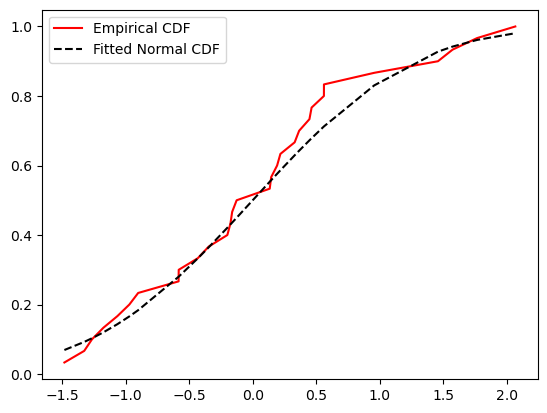

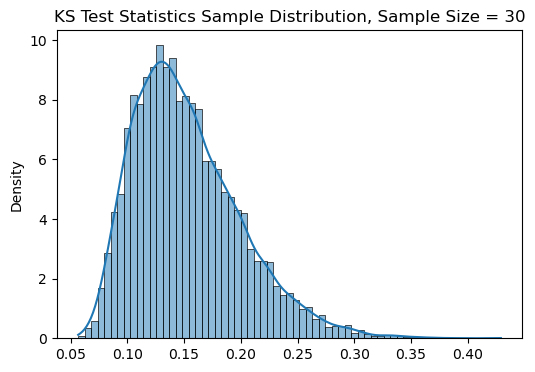

In [7]:
#see cdf and pdf for phi = 0
#use standard normal parameters
#sample size of 30
rng = np.random.default_rng() #default is mu = 0, std = 1
n_trials = 10000
sample_size = 30
stats_values_ks_30 = [] 

rejections = []
for i in range(n_trials):
    data = np.sort(rng.normal(size=sample_size));
    result = stats.kstest(data, stats.norm.cdf);
    pvalue = result[1] #get p-value only of tuple
    stats_values_ks_30.append(result[0])
    rejections.append(pvalue);

emp_cdf = np.arange(1, sample_size + 1) / sample_size
null_cdf = stats.norm.cdf(data, loc=0, scale=1)

plt.plot(data, emp_cdf, 'r-', label='Empirical CDF');
plt.plot(data, null_cdf, 'k--', label='Fitted Normal CDF') ;
plt.legend(); 
plt.figure(figsize=(6, 4))
sns.histplot(stats_values_ks_30, kde=True, stat='density', label='Sample PDF');
plt.title(f'KS Test Statistics Sample Distribution, Sample Size = {sample_size}');

rejection_rate = np.mean(np.array(rejections) < 0.05);
print(f'Rejection rate: {rejection_rate}');

Text(0.5, 0, 'Time')

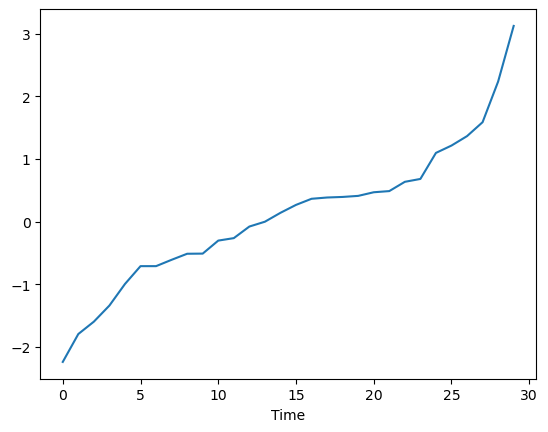

In [6]:
sample_size = 30
data = np.sort(generate_ar1(n=sample_size, phi=0.5))
plt.plot(data); plt.xlabel('Time')

Rejection rate: 0.0495


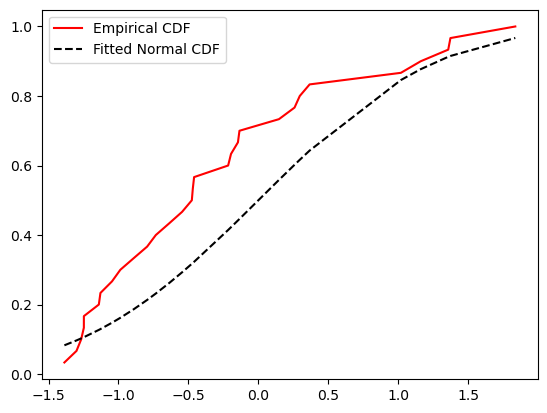

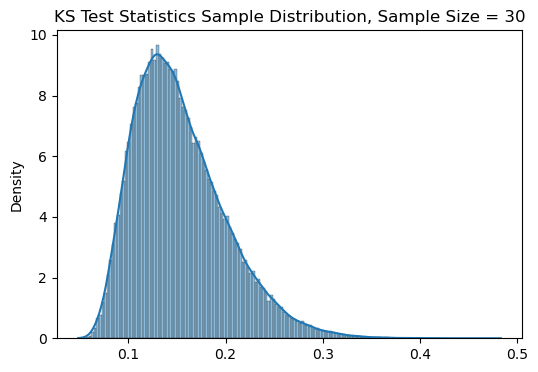

In [13]:
#see cdf and pdf for phi = 0
#use standard normal parameters
#sample size of 30
rng = np.random.default_rng() #default is mu = 0, std = 1
n_trials = 100000
sample_size = 30
stats_values_ks_30 = [] 

#np.random.normal generates a single random sample that is following a normal distr

rejections = []
for i in range(n_trials):
    samples = []
    for f in range(sample_size):
        samples.append(np.random.normal(0,1))
    data = np.sort(samples)
    result = stats.kstest(data, stats.norm.cdf);
    pvalue = result[1] #get p-value only of tuple
    stats_values_ks_30.append(result[0])
    rejections.append(pvalue);

emp_cdf = np.arange(1, sample_size + 1) / sample_size
null_cdf = stats.norm.cdf(data, loc=0, scale=1)

plt.plot(data, emp_cdf, 'r-', label='Empirical CDF');
plt.plot(data, null_cdf, 'k--', label='Fitted Normal CDF') ; plt.legend();
plt.figure(figsize=(6, 4))
sns.histplot(stats_values_ks_30, kde=True, stat='density', label='Sample PDF');
plt.title(f'KS Test Statistics Sample Distribution, Sample Size = {sample_size}');
rejection_rate = np.mean(np.array(rejections) < 0.05);
print(f'Rejection rate: {rejection_rate}');

Here, I'm plotting the residuals of AR(1), which are normally distributed. This is how we would appropriately approach this for time series.

Rejection rate: 0.98057


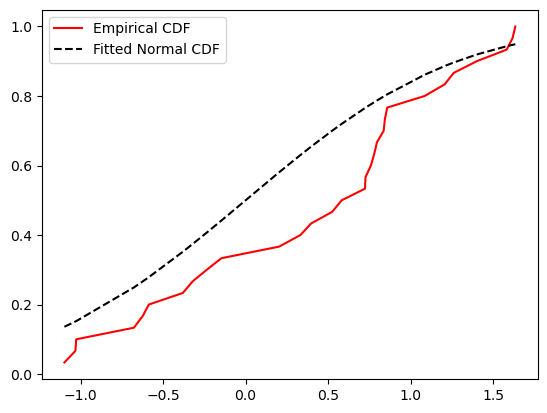

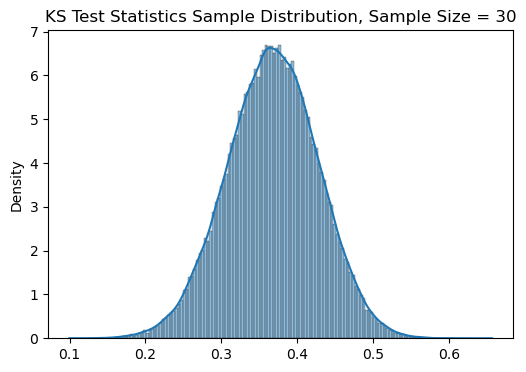

In [14]:
#now using correlated data, correlated residuals of AR(1) model 
#sample size of 30
n_trials = 100000
sample_size = 30
stats_values_ks_30 = [] 

import random as random

rejections = []
for i in range(n_trials):
    samples = []
    for f in range(sample_size):
        x = np.random.normal(0,1)
        #create linear combination of sample/value
        sample = random.random()*x + random.random()
        samples.append(sample)  
    data = np.sort(samples)
    result = stats.kstest(data, stats.norm.cdf);
    pvalue = result[1] #get p-value only of tuple
    stats_values_ks_30.append(result[0])
    rejections.append(pvalue);

emp_cdf = np.arange(1, sample_size + 1) / sample_size
null_cdf = stats.norm.cdf(data, loc=0, scale=1)

plt.plot(data, emp_cdf, 'r-', label='Empirical CDF');
plt.plot(data, null_cdf, 'k--', label='Fitted Normal CDF') ; plt.legend();
plt.figure(figsize=(6, 4))
sns.histplot(stats_values_ks_30, kde=True, stat='density', label='Sample PDF');
plt.title(f'KS Test Statistics Sample Distribution, Sample Size = {sample_size}');
rejection_rate = np.mean(np.array(rejections) < 0.05);
print(f'Rejection rate: {rejection_rate}');

### Lilliefors Test

In [4]:
#imports
from statsmodels.stats._lilliefors import (
    kstest_exponential,
    kstest_fit,
    kstest_normal,
    lilliefors,
)

Rejection rate: 0.05127


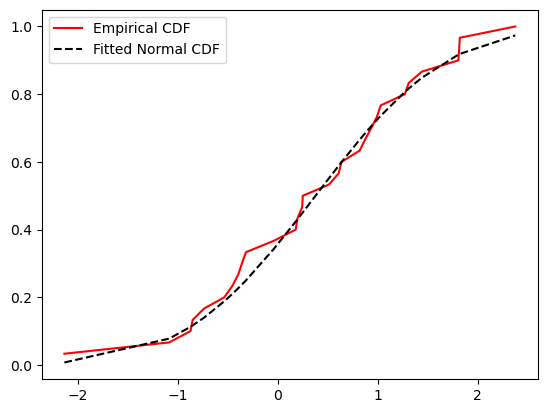

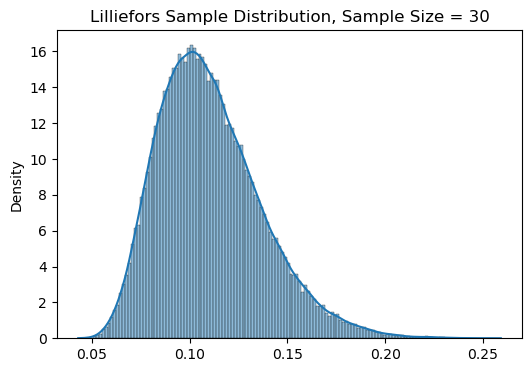

In [6]:
#see cdf and pdf for phi = 0
#use standard normal parameters
#sample size of 30
n_trials = 100000
sample_size = 30
stats_values_lil_30 = [] 

rejections = []
for i in range(n_trials):
    samples = []
    for f in range(sample_size):
        samples.append(np.random.normal(0,1))
    data = np.sort(samples)
    #dist = norm estimates from each sample instead of using the known mu and std
    result = lilliefors(data, dist='norm', pvalmethod='table'); #table uses a very large simulation
    pvalue = result[1] #get p-value only of tuple
    stats_values_lil_30.append(result[0])
    rejections.append(pvalue);

emp_cdf = np.arange(1, sample_size + 1) / sample_size
mu_hat = np.mean(data)
sigma_hat = np.std(data, ddof=1)
null_cdf = stats.norm.cdf(data, loc=mu_hat, scale=sigma_hat)
plt.plot(data, emp_cdf, 'r-', label='Empirical CDF');
plt.plot(data, null_cdf, 'k--', label='Fitted Normal CDF') ; plt.legend();
plt.figure(figsize=(6, 4))
sns.histplot(stats_values_lil_30, kde=True, stat='density', label='Sample PDF');
plt.title(f'Lilliefors Sample Distribution, Sample Size = {sample_size}');
rejection_rate = np.mean(np.array(rejections) < 0.05);
print(f'Rejection rate: {rejection_rate}');

In [7]:
#see cdf and pdf for phi = 0
#use standard normal parameters
#sample size of 30
n_trials = 100000
sample_size = 30
stats_values_lil_30 = [] 

rejections = []
for i in range(n_trials):
    samples = []
    for f in range(sample_size):
        x = np.random.normal(0,1)
        #create linear combination of sample/value
        sample = random.random()*x + random.random()
        samples.append(sample) 
    data = np.sort(samples)
    #dist = norm estimates from each sample instead of using the known mu and std
    result = lilliefors(data, dist='norm', pvalmethod='table'); #table uses a very large simulation
    pvalue = result[1] #get p-value only of tuple
    stats_values_lil_10.append(result[0])
    rejections.append(pvalue);

emp_cdf = np.arange(1, sample_size + 1) / sample_size
mu_hat = np.mean(data)
sigma_hat = np.std(data, ddof=1)
null_cdf = stats.norm.cdf(data, loc=mu_hat, scale=sigma_hat)
plt.plot(data, emp_cdf, 'r-', label='Empirical CDF');
plt.plot(data, null_cdf, 'k--', label='Fitted Normal CDF') ; plt.legend();
plt.figure(figsize=(6, 4))
sns.histplot(stats_values_lil_10, kde=True, stat='density', label='Sample PDF');
plt.title(f'Lilliefors Sample Distribution, Sample Size = {sample_size}');
rejection_rate = np.mean(np.array(rejections) < 0.05);
print(f'Rejection rate: {rejection_rate}');

NameError: name 'random' is not defined

### Shapiro-Wilks Test

Rejection_rate: 0.04827


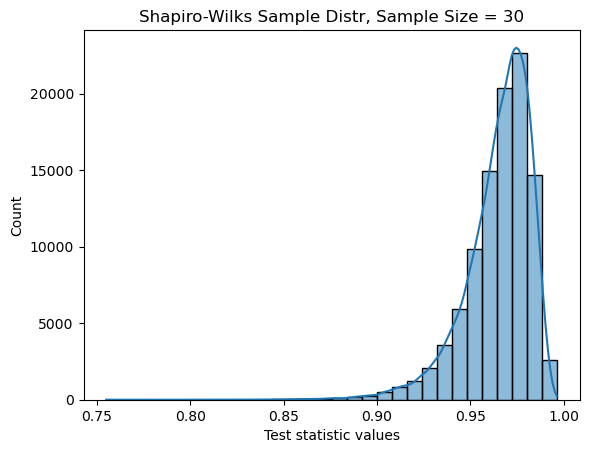

In [8]:
#sample size = 30
rng = np.random.default_rng() #default is mu = 0, std = 1
n_trials = 100000
sample_size = 30
stats_values_30 = []

rejections = []
for i in range(n_trials):
    samples = []
    for f in range(sample_size):
        samples.append(np.random.normal(0,1))
    data = np.sort(samples)
    result = stats.shapiro(data)
    stat, pval = stats.shapiro(data)
    stats_values_30.append(stat)
    rejections.append(pval)

stats_values_30 = np.array(stats_values_30)
rejection_rate = np.mean(np.array(rejections) < 0.05)
hist_30 = sns.histplot(stats_values_30, bins=30, kde=True, edgecolor='black')
plt.xlabel('Test statistic values')
plt.title(f'Shapiro-Wilks Sample Distr, Sample Size = {sample_size}')
print(f'Rejection_rate: {rejection_rate}')

### Anderson-Darling Test

Rejection_rate: 0.05678


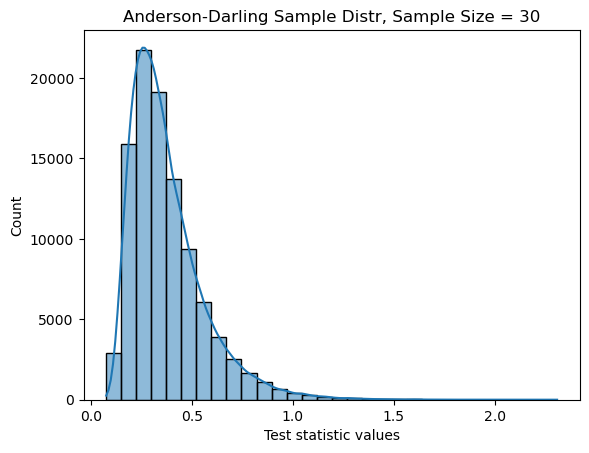

In [11]:
#sample size = 30
rng = np.random.default_rng()
n_trials = 100000
sample_size = 30

AD_stats_30 = []
rejections = []
for i in range(n_trials):
    samples = []
    for f in range(sample_size):
        samples.append(np.random.normal(0,1))
    data = np.sort(samples)
    result = stats.anderson(data, dist='norm')
    #does not return p-value in fn 
    stat = result.statistic
    AD_stats_30.append(stat)
    crit_vals = result.critical_values
    sig_levels = result.significance_level/100
    reject = stat > crit_vals[sig_levels.tolist().index(0.05)]
    rejections.append(reject)
    
rejection_rate = np.mean(rejections)

sns.histplot(AD_stats_30, bins=30, kde=True, edgecolor='black')
plt.xlabel('Test statistic values'); plt.title(f'Anderson-Darling Sample Distr, Sample Size = {sample_size}')
print(f'Rejection_rate: {rejection_rate}')

## Figures

In [8]:
### read data in saved from csv files
ks_norm_data = pd.read_csv('ks_testing/data/ks_norm_data.csv')
ks_correlated_phi_data = pd.read_csv('ks_correlated_phi_data.csv')

lilliefors_norm_data = pd.read_csv('lilliefors_norm_data.csv')
lilliefors_correlated_phi_data = pd.read_csv('lilliefors_correlated_phi_data.csv')

AD_norm_data = pd.read_csv('AD_norm_data.csv')
AD_correlated_phi_data = pd.read_csv('AD_Correlated_phi_data.csv')

shapiro_norm_data = pd.read_csv('shapiro_normal_data.csv') #rename to be consistent with other csv files
shapiro_correlated_data = pd.read_csv('shapiro_correlated_data.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'ks_testing/data/ks_norm_data.csv'

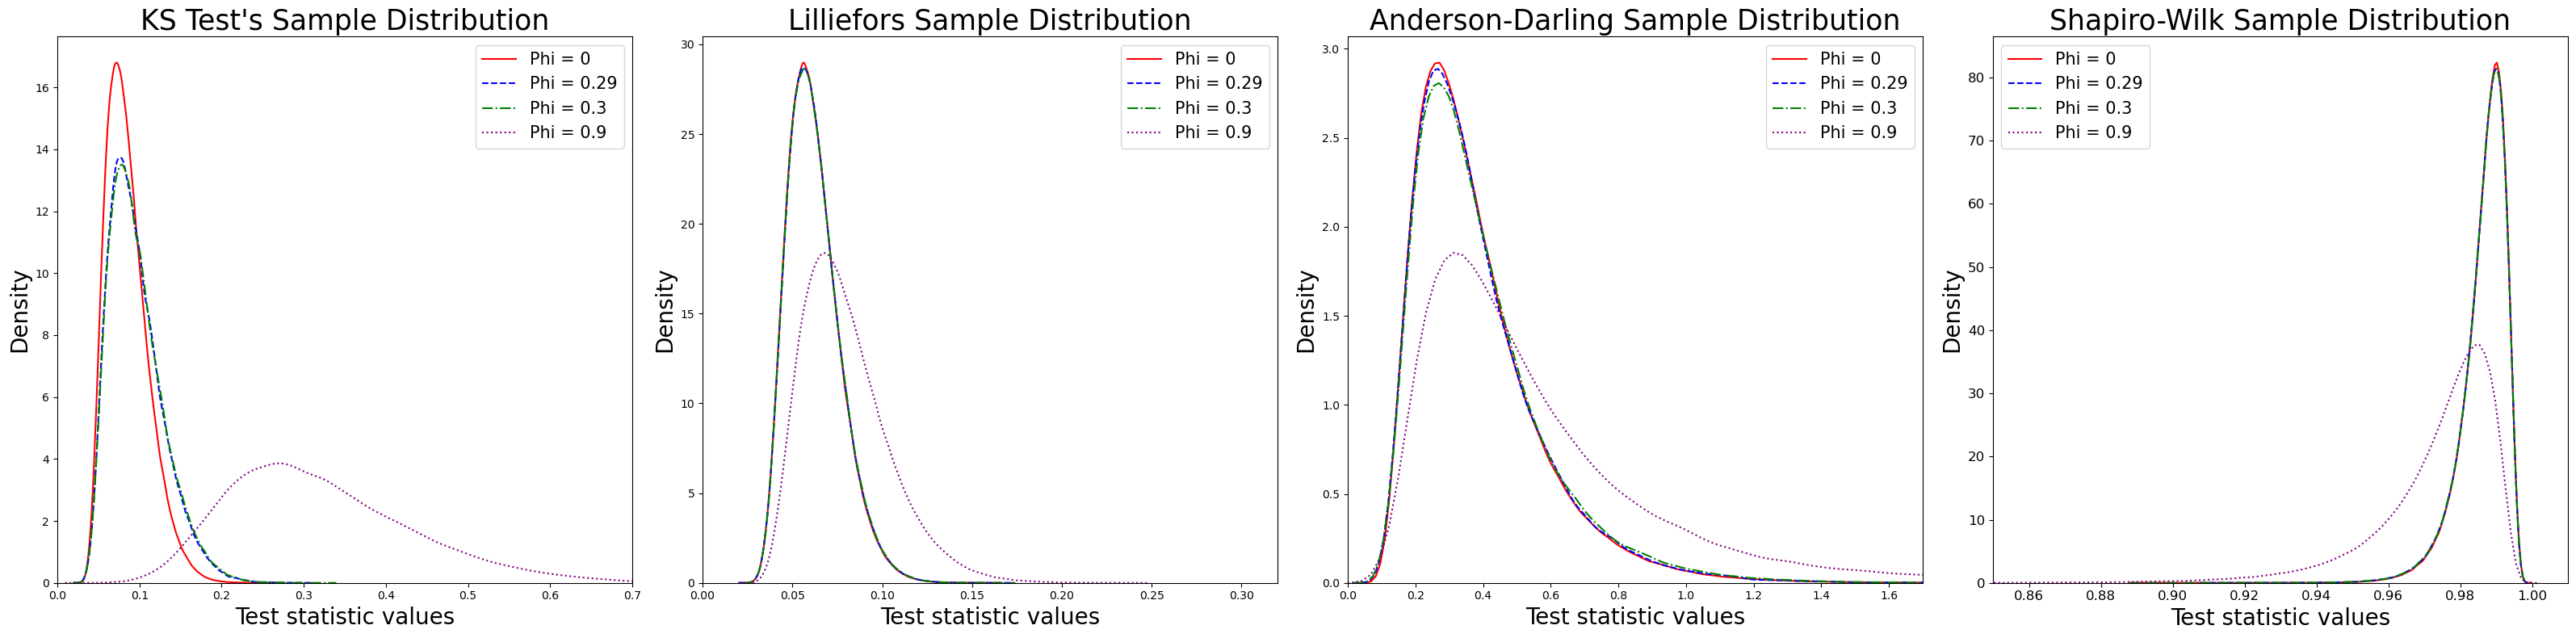

In [44]:
fig, axes = plt.subplots(1, 4, figsize=(32, 8))  # Adjust width for spacing
palette = sns.color_palette("Set2", 5)

### Panel 1: KS Test ###
# norm_columns_ks = ['stats_ks_values_10', 'stats_ks_values_30']
# labels_ks = ['D10', 'D30'] #D is the test statistic symbol for KS test
ax = axes[0]

# for i, (col, label) in enumerate(zip(norm_columns_ks, labels_ks)):
#     sns.kdeplot(ks_norm_data[col], label=label, color=palette[i], ax=ax)

sns.kdeplot(ks_norm_data['stats_ks_values_100'], label='Phi = 0', linestyle='-', color='red', ax=ax)
sns.kdeplot(ks_correlated_phi_data['stats_values_phi_1'], label='Phi = 0.29', linestyle='--', color='blue', ax=ax)
sns.kdeplot(ks_correlated_phi_data['stats_values_phi_2'], label='Phi = 0.3', linestyle='-.', color='green', ax=ax)
sns.kdeplot(ks_correlated_phi_data['stats_values_phi_3'], label='Phi = 0.9', linestyle=':', color='purple', ax=ax)

ax.set_xlim(0, 0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax.set_title("KS Test's Sample Distribution", fontsize=25)
ax.set_xlabel("Test statistic values", fontsize=20); ax.set_ylabel('Density', fontsize=20)
ax.legend(fontsize=15)

### Panel 2: Lilliefors ###
# norm_columns_lil = ['stats_values_lil_10', 'stats_values_lil_30']
# labels_lil = ['T10', 'T30'] #T is the test statistic for lilliefors test
ax = axes[1]

# for i, (col, label) in enumerate(zip(norm_columns_lil, labels_lil)):
#     sns.kdeplot(lilliefors_norm_data[col], label=label, color=palette[i], ax=ax)

sns.kdeplot(lilliefors_norm_data['stats_values_lil_100'], label='Phi = 0', linestyle='-', color='red', ax=ax)
sns.kdeplot(lilliefors_correlated_phi_data['stats_values_phi_1'], label='Phi = 0.29', linestyle='--', color='blue', ax=ax)
sns.kdeplot(lilliefors_correlated_phi_data['stats_values_phi_2'], label='Phi = 0.3', linestyle='-.', color='green', ax=ax)
sns.kdeplot(lilliefors_correlated_phi_data['stats_values_phi_3'], label='Phi = 0.9', linestyle=':', color='purple', ax=ax)

ax.set_xlim(0,0.32)
ax.set_title("Lilliefors Sample Distribution", fontsize=25)
ax.set_xlabel("Test statistic values", fontsize=20); ax.set_ylabel('Density', fontsize=20)

ax.legend(fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

### Panel 3: Anderson-Darling ###
# norm_columns_ad = ['stats_values_AD_10', 'stats_values_AD_30']
# labels_ad = ['A10', 'A30'] #A is the test statistic for AD test
ax = axes[2]

# for i, (col, label) in enumerate(zip(norm_columns_ad, labels_ad)):
#     sns.kdeplot(AD_norm_data[col], label=label, color=palette[i], ax=ax)

sns.kdeplot(AD_norm_data['stats_values_AD_100'], label='Phi = 0', linestyle='-', color='red', ax=ax)
sns.kdeplot(AD_correlated_phi_data['stats_values_AD_phi_1'], label='Phi = 0.29', linestyle='--', color='blue', ax=ax)
sns.kdeplot(AD_correlated_phi_data['stats_values_AD_phi_2'], label='Phi = 0.3', linestyle='-.', color='green', ax=ax)
sns.kdeplot(AD_correlated_phi_data['stats_values_AD_phi_3'], label='Phi = 0.9', linestyle=':', color='purple', ax=ax)

ax.set_xlim(0, 1.7)

ax.set_title("Anderson-Darling Sample Distribution", fontsize=25)
ax.set_xlabel("Test statistic values", fontsize=20); ax.set_ylabel('Density', fontsize=20)
ax.legend(fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

### Panel 4: Shapiro-Wilk ###
# norm_columns_sw = ['stats_values_10', 'stats_values_30']
# labels_sw = ['W10', 'W30']
ax = axes[3]

# for i, (col, label) in enumerate(zip(norm_columns_sw, labels_sw)):
#     sns.kdeplot(shapiro_norm_data[col], label=label, color=palette[i], ax=ax)

sns.kdeplot(shapiro_norm_data['stats_values_100'], label='Phi = 0', linestyle='-', color='red', ax=ax)
sns.kdeplot(shapiro_correlated_data['stats_values_phi_1'], label='Phi = 0.29', linestyle='--', color='blue', ax=ax)
sns.kdeplot(shapiro_correlated_data['stats_values_phi_2'], label='Phi = 0.3', linestyle='-.', color='green', ax=ax)
sns.kdeplot(shapiro_correlated_data['stats_values_phi_3'], label='Phi = 0.9', linestyle=':', color='purple', ax=ax)

ax.set_xlim(0.85, 1.01)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax.set_title("Shapiro-Wilk Sample Distribution", fontsize=25)
ax.set_xlabel("Test statistic values", fontsize=20); ax.set_ylabel('Density', fontsize=20)
ax.legend(fontsize=15)

plt.tight_layout()
plt.show()

In [4]:
#import data from csv to df
ad_ar1_reject_rates_df = pd.read_csv('ad_ar1_reject_rates.csv')
ks_ar1_reject_rates_df = pd.read_csv('ks_ar1_reject_rates.csv')
lilliefors_ar1_reject_rates_df = pd.read_csv('lilliefors_ar1_reject_rates.csv')
shapiro_ar1_reject_rates_df = pd.read_csv('shapiro_ar1_reject_rates.csv')

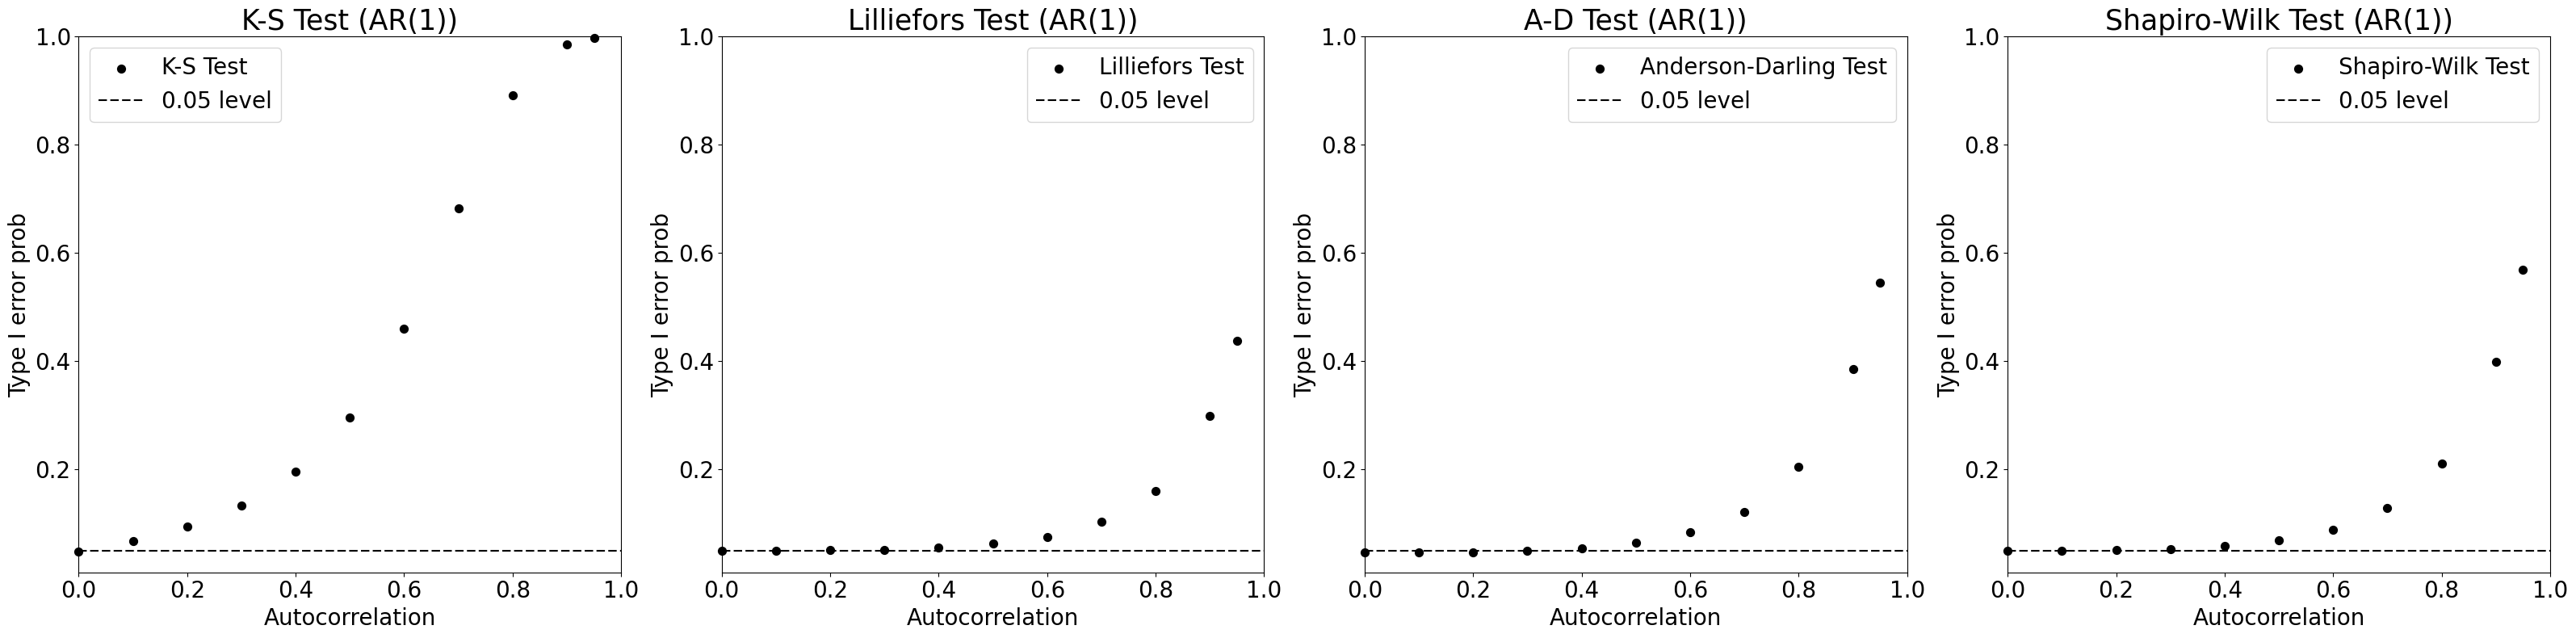

In [5]:
fig, axes = plt.subplots(1, 4, figsize=(32, 8))
x_ticks = np.arange(0, 1.2, 0.2)
y_ticks = np.arange(0, 1.2, 0.2)

###KS Test###
ax = axes[0]
ax.scatter(ks_ar1_reject_rates_df['Phi Values'], ks_ar1_reject_rates_df['Rejection Rates'], color='black', clip_on=False, 
           label='K-S Test', s=50)
ax.axhline(y=0.05, color='k', linestyle='--', dashes=(5, 2), label='0.05 level')
ax.set_xticks(x_ticks); ax.set_yticks(y_ticks)
ax.set_xlim(0, 1.0); ax.set_ylim(0.01, 1.0); ax.tick_params(axis='both', labelsize=20);
ax.set_xlabel('Autocorrelation', fontsize=20); ax.set_ylabel('Type I error prob', fontsize=20); ax.set_title('K-S Test (AR(1))', fontsize=25)
ax.legend(fontsize=20)

###Lilliefors Test###
ax = axes[1]
ax.scatter(lilliefors_ar1_reject_rates_df['Phi Values'], lilliefors_ar1_reject_rates_df['Rejection Rates'], color='black', clip_on=False, 
           label='Lilliefors Test', s=50)
ax.axhline(y=0.05, color='k', linestyle='--', dashes=(5, 2), label='0.05 level')
ax.set_xticks(x_ticks); ax.set_yticks(y_ticks)
ax.set_xlim(0, 1.0); ax.set_ylim(0.01, 1.0); ax.tick_params(axis='both', labelsize=20);
ax.set_xlabel('Autocorrelation', fontsize=20); ax.set_ylabel('Type I error prob', fontsize=20); ax.set_title('Lilliefors Test (AR(1))', fontsize=25)
ax.legend(fontsize=20)

###Anderson-Darling Test###
ax = axes[2]
ax.scatter(ad_ar1_reject_rates_df['Phi Values'], ad_ar1_reject_rates_df['Rejection Rates'], color='black', clip_on=False, 
           label='Anderson-Darling Test', s=50)
ax.axhline(y=0.05, color='k', linestyle='--', dashes=(5, 2), label='0.05 level')
ax.set_xticks(x_ticks); ax.set_yticks(y_ticks)
ax.set_xlim(0, 1.0); ax.set_ylim(0.01, 1.0); ax.tick_params(axis='both', labelsize=20);
ax.set_xlabel('Autocorrelation', fontsize=20); ax.set_ylabel('Type I error prob', fontsize=20); ax.set_title('A-D Test (AR(1))', fontsize=25)
ax.legend(fontsize=20)

###Shapiro-Wilk Test###
ax = axes[3]
ax.scatter(shapiro_ar1_reject_rates_df['Phi Values'], shapiro_ar1_reject_rates_df['Rejection Rates'], color='black', clip_on=False, 
           label='Shapiro-Wilk Test', s=50)
ax.axhline(y=0.05, color='k', linestyle='--', dashes=(5, 2), label='0.05 level')
ax.set_xticks(x_ticks); ax.set_yticks(y_ticks)
ax.set_xlim(0, 1.0); ax.set_ylim(0.01, 1.0); ax.tick_params(axis='both', labelsize=20);
ax.set_xlabel('Autocorrelation', fontsize=20); ax.set_ylabel('Type I error prob', fontsize=20); ax.set_title('Shapiro-Wilk Test (AR(1))', fontsize=25)
ax.legend(fontsize=20)

plt.tight_layout();